<a href="https://colab.research.google.com/github/mattbobea/Data_Science/blob/main/Chapter_5A_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 01 Load data

URL: https://www.nasdaq.com/market-activity/stocks/tsla/historical

In [ ]:
import pandas as pd

tesla_pd = pd.read_csv('HistoricalData_1670900145960.csv')

In [ ]:
tesla_pd

,Date,Close/Last,Volume,Open,High,Low
0,12/12/2022,$167.82,109794500,$176.1,$177.37,$167.52
1,12/09/2022,$179.05,104872300,$173.84,$182.5,$173.36
2,12/08/2022,$173.44,97624490,$172.2,$175.2,$169.06
3,12/07/2022,$174.04,84213280,$175.03,$179.38,$172.218
4,12/06/2022,$179.82,92150820,$181.215,$183.65,$175.33
...,...,...,...,...,...,...
122,06/17/2022,$216.76,92641779,$213.4333,$220.9694,$213.1966
123,06/16/2022,$213.1,107390711,$222.7366,$225.1666,$208.6933
124,06/15/2022,$233,119131962,$220.9166,$235.6633,$218.15
125,06/14/2022,$220.89,97988800,$218.2866,$226.33,$211.7366


In [ ]:
tesla_pd['Date'] =  pd.to_datetime(tesla_pd['Date'], format='%m/%d/%Y')
tesla_pd

,Date,Close/Last,Volume,Open,High,Low
0,2022-12-12,$167.82,109794500,$176.1,$177.37,$167.52
1,2022-12-09,$179.05,104872300,$173.84,$182.5,$173.36
2,2022-12-08,$173.44,97624490,$172.2,$175.2,$169.06
3,2022-12-07,$174.04,84213280,$175.03,$179.38,$172.218
4,2022-12-06,$179.82,92150820,$181.215,$183.65,$175.33
...,...,...,...,...,...,...
122,2022-06-17,$216.76,92641779,$213.4333,$220.9694,$213.1966
123,2022-06-16,$213.1,107390711,$222.7366,$225.1666,$208.6933
124,2022-06-15,$233,119131962,$220.9166,$235.6633,$218.15
125,2022-06-14,$220.89,97988800,$218.2866,$226.33,$211.7366


In [ ]:
tesla_pd['Date']

0     2022-12-12
1     2022-12-09
2     2022-12-08
3     2022-12-07
4     2022-12-06
         ...    
122   2022-06-17
123   2022-06-16
124   2022-06-15
125   2022-06-14
126   2022-06-13
Name: Date, Length: 127, dtype: datetime64[ns]

In [ ]:
tesla_pd = tesla_pd.set_index('Date')

In [ ]:
tesla_pd

,Close/Last,Volume,Open,High,Low
Date,,,,,
2022-12-12,$167.82,109794500,$176.1,$177.37,$167.52
2022-12-09,$179.05,104872300,$173.84,$182.5,$173.36
2022-12-08,$173.44,97624490,$172.2,$175.2,$169.06
2022-12-07,$174.04,84213280,$175.03,$179.38,$172.218
2022-12-06,$179.82,92150820,$181.215,$183.65,$175.33
...,...,...,...,...,...
2022-06-17,$216.76,92641779,$213.4333,$220.9694,$213.1966
2022-06-16,$213.1,107390711,$222.7366,$225.1666,$208.6933
2022-06-15,$233,119131962,$220.9166,$235.6633,$218.15


In [ ]:
tesla_pd['Close/Last'].str.split('$', expand=True)[1].astype('float')

Date
2022-12-12    167.8200
2022-12-09    179.0500
2022-12-08    173.4400
2022-12-07    174.0400
2022-12-06    179.8200
                ...   
2022-06-17    216.7600
2022-06-16    213.1000
2022-06-15    233.0000
2022-06-14    220.8900
2022-06-13    215.7366
Name: 1, Length: 127, dtype: float64

In [ ]:
tesla_pd['price']= tesla_pd['Close/Last'].str.split('$', expand=True)[1].astype('float')

In [ ]:
tesla_pd

,Close/Last,Volume,Open,High,Low,price
Date,,,,,,
2022-12-12,$167.82,109794500,$176.1,$177.37,$167.52,167.8200
2022-12-09,$179.05,104872300,$173.84,$182.5,$173.36,179.0500
2022-12-08,$173.44,97624490,$172.2,$175.2,$169.06,173.4400
2022-12-07,$174.04,84213280,$175.03,$179.38,$172.218,174.0400
2022-12-06,$179.82,92150820,$181.215,$183.65,$175.33,179.8200
...,...,...,...,...,...,...
2022-06-17,$216.76,92641779,$213.4333,$220.9694,$213.1966,216.7600
2022-06-16,$213.1,107390711,$222.7366,$225.1666,$208.6933,213.1000
2022-06-15,$233,119131962,$220.9166,$235.6633,$218.15,233.0000


In [ ]:
tesla_pd=tesla_pd.sort_index(ascending=True)

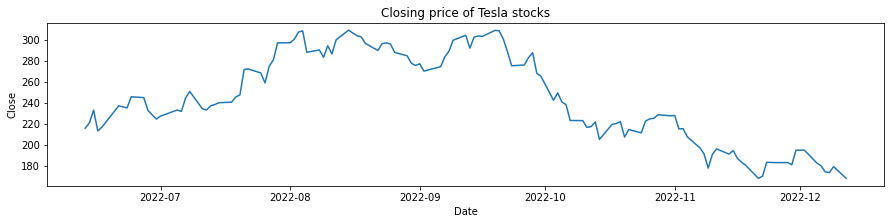

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(tesla_pd.index, tesla_pd['price'])

plt.title("Closing price of Tesla stocks")
plt.xlabel("Date")
plt.ylabel("Close")
plt.show()

## Step 2 ARIMA prediction

Use all the data 30 days ago to predict the stock price trend in the past 30 days

In [ ]:
from sklearn import metrics

def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')

In [ ]:
! pip install pmdarima

from pmdarima import auto_arima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 4.9 MB/s 
     |████████████████████████████████| 9.9 MB 56.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
X = tesla_pd[['price' ]]
train, test = X[0:-30], X[-30:]

In [ ]:
test.shape

(30, 1)

In [ ]:
stepwise_model = auto_arima(train,start_p=1, 
                            start_q=1,
                            max_p=7, 
                            max_q=7, 
                            seasonal=False,
                            d=None, 
                            trace=True,
                            error_action='ignore',
                            suppress_warnings=True, 
                            stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=699.242, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=697.084, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=698.735, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=698.762, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=695.105, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.265 seconds


In [ ]:
forecast, conf_int = stepwise_model.predict(n_periods=30, return_conf_int=True)
forecast = pd.DataFrame(forecast, columns=['close_pred'])

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
forecast

,close_pred
97,228.52
98,228.52
99,228.52
100,228.52
101,228.52
102,228.52
103,228.52
104,228.52
105,228.52
106,228.52


In [ ]:
timeseries_evaluation_metrics_func(test, forecast)

Evaluation metric results:-
MSE is : 1753.6678666666678
RMSE is : 41.87681777149104
MAPE is : 21.257525939736226


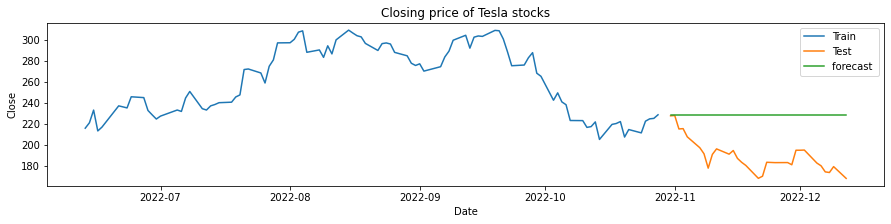

In [ ]:
fig, ax = plt.subplots(figsize=(15, 3))

plt.plot( train, label='Train ')
plt.plot(test, label='Test ')
plt.plot(forecast, label='forecast ')

plt.title("Closing price of Tesla stocks")
plt.xlabel("Date")
plt.ylabel("Close")
plt.legend(loc='best')
plt.show()

In [ ]:
# Can you find better p, q?
# What is the forecast price tomorrow?

In [ ]:
test


,price
Date,
2022-10-31,227.54
2022-11-01,227.82
2022-11-02,214.98
2022-11-03,215.31
2022-11-04,207.47
2022-11-07,197.08
2022-11-08,191.30
2022-11-09,177.59
2022-11-10,190.72


In [ ]:
forecast = forecast.set_index(test.index)